In [ ]:
! pip install tensorflow numpy mnist

Source : 
https://victorzhou.com/blog/keras-cnn-tutorial/
https://www.pyimagesearch.com/2019/02/04/keras-multiple-inputs-and-mixed-data/


In [ ]:
import numpy as np
import mnist
from tensorflow import keras
import tensorflow as tf

# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [8]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical

num_filters = 8
filter_size = 3
pool_size = 2

model_1 = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])

In [56]:
model_1.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  validation_data=(test_images, to_categorical(test_labels)),
)

#print(np.argmax(predictions, axis=1))

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6167 - accuracy: 0.8196 - val_loss: 0.2321 - val_accuracy: 0.9347
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2082 - accuracy: 0.9414 - val_loss: 0.1448 - val_accuracy: 0.9581
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1344 - accuracy: 0.9623 - val_loss: 0.1115 - val_accuracy: 0.9662


In [25]:
! unzip "/content/drive/My Drive/all_vect_new.zip"

Archive:  /content/drive/My Drive/all_vect_new.zip
  inflating: conjugate_data.csv      
  inflating: density_data.csv        
  inflating: grayscale_data.csv      
  inflating: height_data.csv         
  inflating: line_data.csv           
  inflating: radial_data.csv         
  inflating: vr_data.csv             


In [28]:
import pandas as pd
grayscale_data = pd.read_csv("grayscale_data.csv")

In [29]:
grayscale_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7
0,0,0.000000,1.713575,1175.431949,1194.102879,15.968719,34.158720,127.500000,138.257911
1,1,1.122890,2.300040,1325.192468,1192.847660,28.664729,43.599416,151.981907,136.368985
2,2,0.000000,2.511583,1175.431949,1214.629940,15.968719,48.917060,127.500000,149.094769
3,3,0.000000,0.304339,1175.431949,1175.434171,15.968719,17.799387,127.500000,127.527448
4,4,0.993234,2.358662,1467.437163,1195.039365,29.810004,45.109295,165.170367,140.484875


In [57]:
from sklearn.preprocessing import normalize
gray_train = normalize(np.array(grayscale_data)[:60000,1:], axis=0, norm='max')
gray_test = normalize(np.array(grayscale_data)[60000:,1:], axis=0, norm='max')

In [58]:
from keras.utils import plot_model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.models import Model

In [59]:
#Multi input CNN
inputA = Input(shape=(8,))
inputB = Input(shape=(28,28,1))

num_filters = 8
filter_size = 3
pool_size = 2

# first feature extractor
conv1 = Conv2D(num_filters, filter_size, input_shape=(28, 28, 1))(inputB)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
flat1 = Flatten()(pool1)

flat2 = Flatten()(inputA)
merge = concatenate([flat1, flat2])
output = Dense(10, activation='softmax')(merge)
model = Model(inputs = [inputA, inputB], outputs = output)

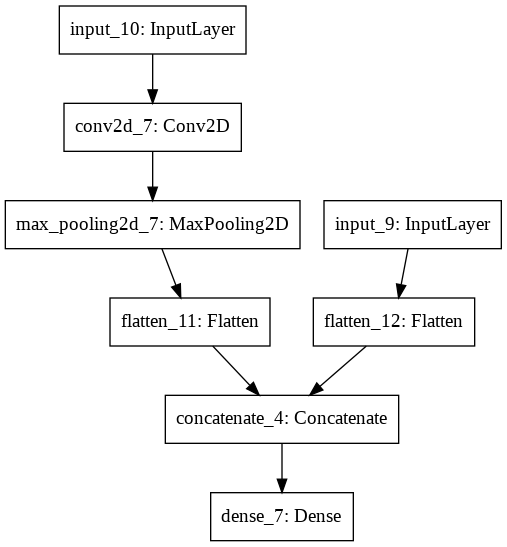

In [60]:
plot_model(model)

In [61]:
model.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [62]:
model.fit(
  [gray_train, train_images],
  to_categorical(train_labels),
  epochs=3,
  validation_data=([gray_test, test_images], to_categorical(test_labels)),
)

Epoch 1/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5651 - accuracy: 0.8381 - val_loss: 0.1588 - val_accuracy: 0.9554
Epoch 2/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1446 - accuracy: 0.9601 - val_loss: 0.1127 - val_accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1008 - accuracy: 0.9710 - val_loss: 0.0909 - val_accuracy: 0.9728
